<a href="https://colab.research.google.com/github/themysterysolver/ML-Learn/blob/main/LAB/WEEK-8/TSP_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import random
import math
import matplotlib.pyplot as plt

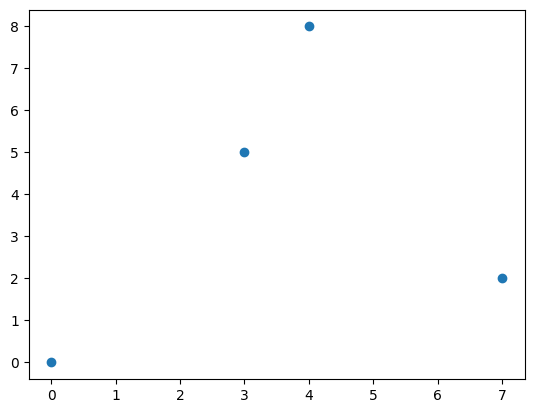

In [5]:
plt.scatter([0,3,7,4],[0,5,2,8])

In [6]:
points=[(0,0),(3,5),(7,2),(4,8)]

In [24]:
def distance(p1, p2):
    x1,y1=p1
    x2,y2=p2
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

In [25]:
def total_distance(path):
  dist=0
  for i in range(len(path)-1):
    dist+=distance(path[i],path[i+1])
  dist+=distance(path[-1],path[0])
  return dist

In [26]:
def init_population(size,points):
  population=[]
  for _ in range(size):
    path=points[1:]
    random.shuffle(path)
    population.append([points[0]]+path)
  return population

In [27]:
def tournament_selection(population):
  tournament=random.sample(population,5)
  tournament.sort(key=lambda x:total_distance(x))
  return tournament[0],tournament[1]

In [28]:
def mutate(path):
  i,j=random.sample(range(1,len(path)),2)
  path[i],path[j]=path[j],path[i]

In [29]:
def cross_over(parent1,parent2):
  size=len(parent1)
  start,end=sorted(random.sample(range(1,size),2))
  offspring=[-1]*size
  offspring[start:end+1]=parent1[start:end+1]

  pos=0
  for i in range(1,size):
    if parent2[i] not in offspring:
      while offspring[pos]!=-1:
        pos+=1
      offspring[pos]=parent2[i]
  return offspring

In [30]:
def GA_TVS(population_size,generations):
  population=init_population(population_size,points)
  best_sol=min(population,key=lambda x:total_distance(x))
  for epoch in range(generations):
    new_population=[]
    for _ in range(population_size//2):
      parent1,parent2=tournament_selection(population)
      off1=cross_over(parent1,parent2)
      off2=cross_over(parent2,parent1)

      if random.random()<0.1:
        mutate(off1)
        mutate(off2)
      new_population.extend([off1,off2])
  population=new_population
  best_gen=min(population,key=lambda x:total_distance(x))
  if total_distance(best_gen) < total_distance(best_sol):
          best_sol = best_gen
  return best_sol

In [34]:
#best_path=GA_TVS(50,100)

In [33]:
import random
import math

# Define the delivery points (including start point)
points = [(0, 0), (3, 5), (7, 2), (4, 8)]

# Calculate Euclidean distance between two points
def distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Calculate the total distance of a given path
def total_distance(path):
    dist = 0
    for i in range(len(path) - 1):
        dist += distance(path[i], path[i + 1])
    dist += distance(path[-1], path[0])  # Returning to the start point
    return dist

# Initialize population with random routes
def init_population(size, points):
    population = []
    for _ in range(size):
        path = points[1:]  # Exclude start point
        random.shuffle(path)
        population.append([points[0]] + path)  # Start point is always the first
    return population

# Selection (Tournament selection)
def selection(population):
    tournament = random.sample(population, min(5, len(population)))  # Ensure we don't sample more than population size
    tournament.sort(key=lambda x: total_distance(x))
    return tournament[0], tournament[1]

# Crossover (Order Crossover)
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(1, size), 2))  # Random cross range

    # Create offspring with None values
    offspring = [None] * size
    offspring[0] = parent1[0]  # Keep the starting point

    # Copy the segment from parent1
    offspring[start:end+1] = parent1[start:end+1]

    # Fill in remaining positions from parent2
    current_pos = 1  # Start after the fixed starting point
    for i in range(1, size):
        if parent2[i] not in offspring:
            while current_pos < size and offspring[current_pos] is not None:
                current_pos += 1
            if current_pos < size:
                offspring[current_pos] = parent2[i]

    # Make sure no None values remain (shouldn't happen with correct implementation)
    if None in offspring:
        # Fallback: fill remaining positions with missing points in order
        missing = [point for point in parent2 if point not in offspring]
        for i in range(size):
            if offspring[i] is None:
                if missing:
                    offspring[i] = missing.pop(0)

    return offspring

# Mutation (Swap Mutation)
def mutate(path):
    if len(path) > 2:  # Need at least 2 points to swap (excluding start)
        i, j = random.sample(range(1, len(path)), 2)
        path[i], path[j] = path[j], path[i]

# Main genetic algorithm function
def genetic_algorithm(population_size, generations):
    population = init_population(population_size, points)

    best_solution = min(population, key=lambda x: total_distance(x))
    best_distance = total_distance(best_solution)

    for gen in range(generations):
        new_population = []

        # Generate new population
        for _ in range(population_size // 2):
            parent1, parent2 = selection(population)
            offspring1 = crossover(parent1, parent2)
            offspring2 = crossover(parent2, parent1)

            # Apply mutation
            if random.random() < 0.1:  # Mutation probability
                mutate(offspring1)
            if random.random() < 0.1:  # Mutation probability
                mutate(offspring2)

            new_population.extend([offspring1, offspring2])

        # Update population
        population = new_population
        best_in_generation = min(population, key=lambda x: total_distance(x))
        current_best_distance = total_distance(best_in_generation)
        if current_best_distance < best_distance:
            best_solution = best_in_generation
            best_distance = current_best_distance

    return best_solution

# Run the genetic algorithm
best_path = genetic_algorithm(50, 500)
print("Best Path:", best_path)
print("Total Distance:", total_distance(best_path))

Best Path: [(0, 0), (3, 5), (4, 8), (7, 2)]
Total Distance: 22.981543376793567
